## Lecture 5 - Scikit-learn API (Part 2)
Assignment: Unsupervised learning with K-Means and PCA

Instructions:

- Work with a numeric dataset
- Visualize results
- Add short comments to explain your plots


## Task 1: K-Means clustering
Cluster a numeric dataset and choose k using the elbow method.
     

In [1]:
# TODO: Load a numeric dataset (iris features or another)
from sklearn.datasets import load_iris

# Reading in data is usually about this simple
# It often looks like: data = pd.read_csv("filename.csv")

data = load_iris(as_frame=True)

# It is not guaranteed that your input data is a neat dictionary
# split into data and target, BUT: regardless of how the data is
# structured, we want to get an X and a y. 
X = data.data
# For unsupervised learning, it may be that
# we don’t even have a y.
# The task may be to find groupings (clusters).
y = data.target

## Extra EDA-step, wi plot the data
A common mistake: We do EDA outside the notebook, online, or by googling around. When we then come back to the notebook,
we have forgotten what we did and why. That’s why it’s important to do EDA in the notebook.

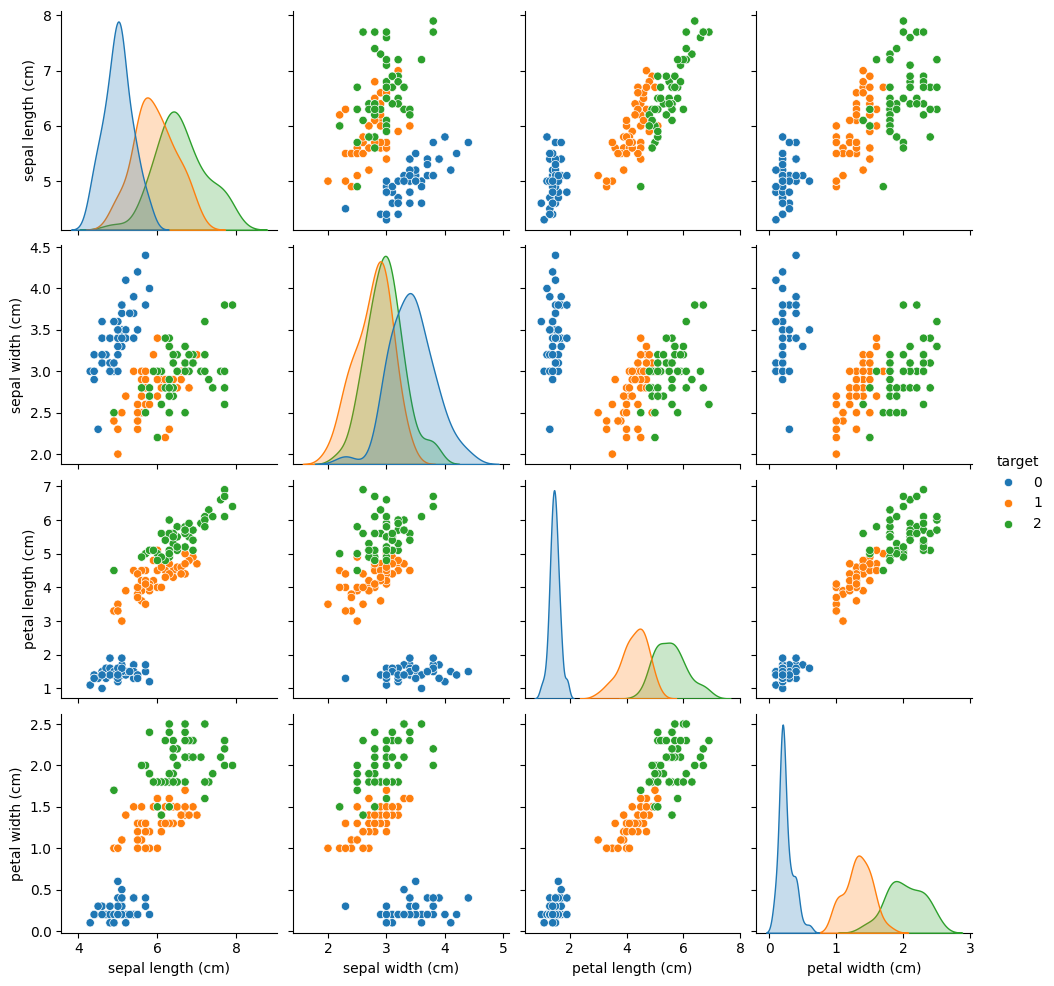

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn pairplot exempel
# Seaborn is a good complement to matplotlib.
# A very common use case is pairplot.
# Pairplot plots high-dimensional data, broken down into
# pairs of two dimensions, AS WELL AS the distribution of
# all variables (histograms).

sns.pairplot(data=data.frame, hue="target", vars=data.feature_names, palette="tab10")
plt.show()

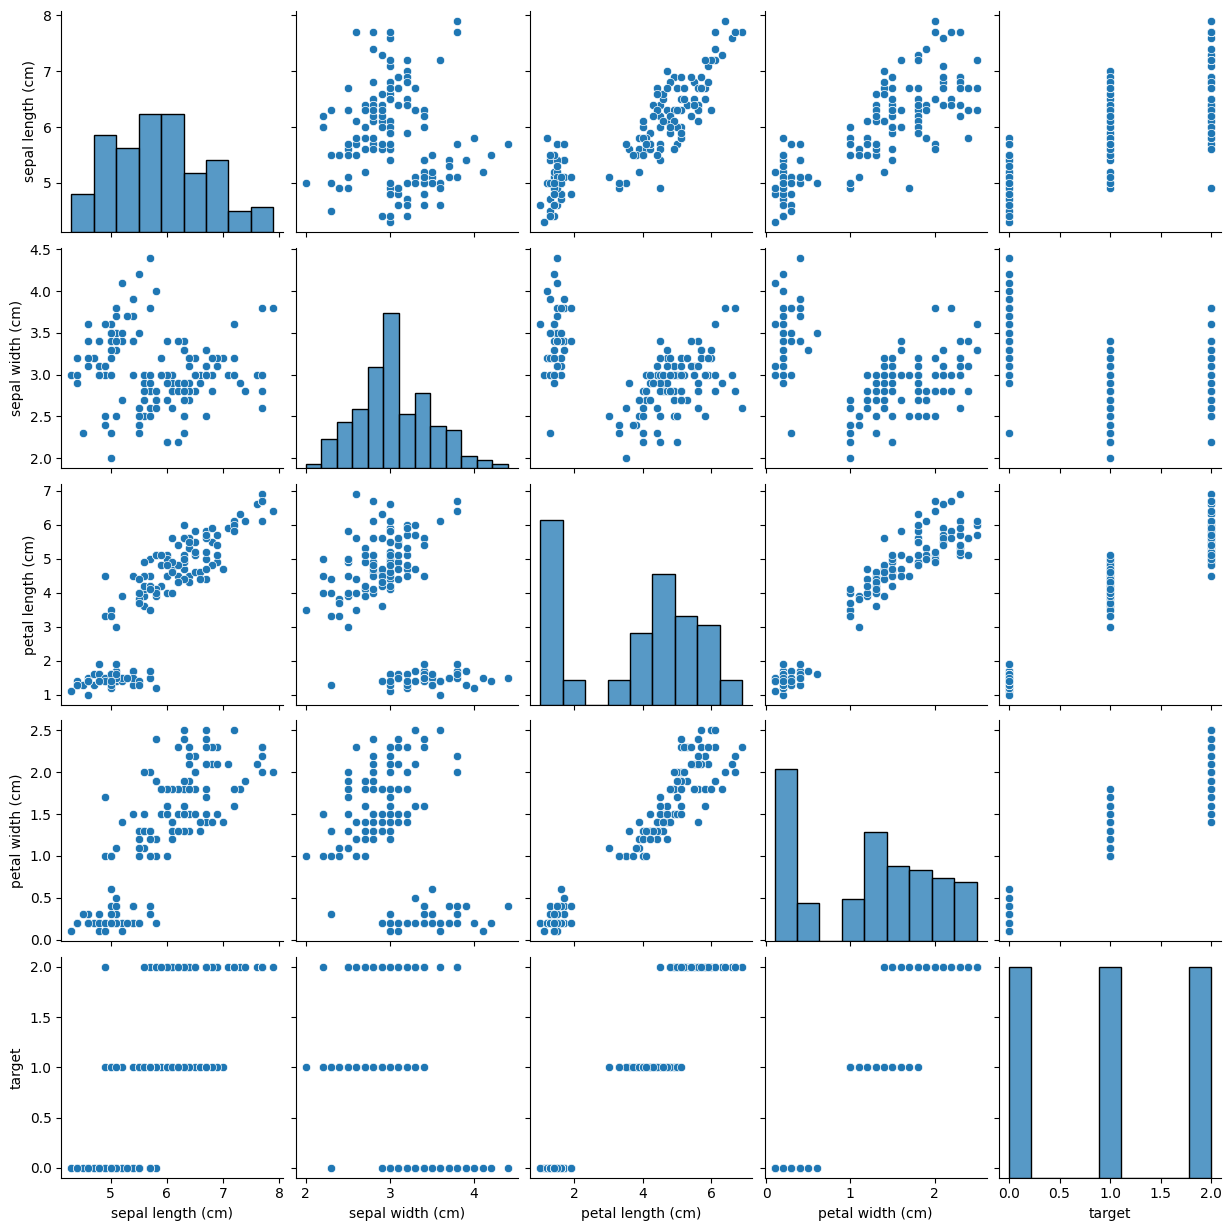

In [3]:
sns.pairplot(data.frame)

In [4]:
# TODO: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X_scaled[:,3].std()

np.float64(1.0)

In [6]:
print("X before scaling:", X)
print("X after scaling:", X_scaled)

X before scaling:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
X after scaling: [[-9.

In [7]:
# TODO: Try k = 1..8 and compute inertia
from sklearn.cluster import KMeans

# Try k = 1..8 and compute inertia (elbow)
# Inertia: how similar the clusters are internally

# In the loop below, we train KMeans models with several different values of K
# to evaluate which one gives the best result
# THAT IS: how many clusters we reasonably have in our data

ks = range(1, 9)
inertias = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

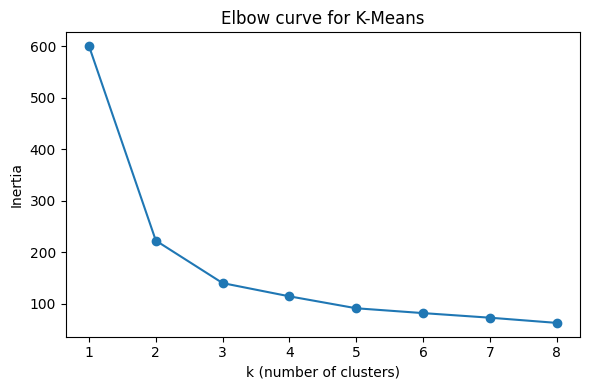

In [61]:
# TODO: Plot the elbow curve and choose k

# In the plot, it looks a bit like we have an elbow at k=2?
# But maybe also a small one at k=3?

# For our data, this seems reasonable. To our eyes,
# it looks like the data could maybe be 2 clusters, and maybe 3.
# In practice, we might try clustering both.

plt.figure(figsize=(6, 4))
plt.plot(list(ks), inertias, marker="o")
plt.title("Elbow curve for K-Means")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

In [8]:
# We saw in the elbow plot that k=3 was probably the best!

# Choose k=3 (reasonable for Iris) and fit
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

## 

## Task 2: PCA visualization
Project to 2D and visualize structure.

In [9]:
# TODO: Apply PCA with n_components=3
from sklearn.decomposition import PCA

# PCA is about reducing high-dimensional data to lower dimensions.
# It is quite good at preserving relationships.
# We set a parameter n_components, which is how many dimensions we want, typically 2.

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [10]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
# check explained variance 
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
# check the cumulative sum:
sum(pca.explained_variance_ratio_)

np.float64(0.9581320720000164)

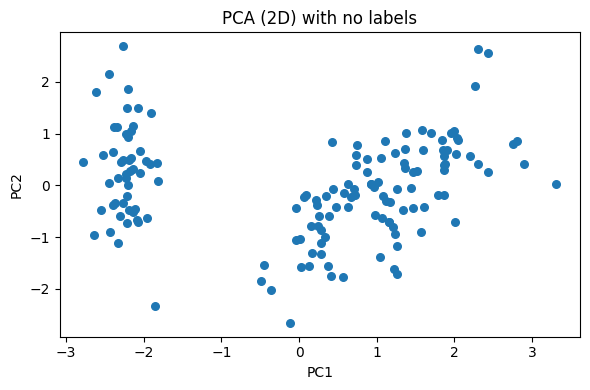

In [13]:
# TODO: Plot the 2D projection

# Plot PCA projection colored by true labels
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30)
plt.title("PCA (2D) with no labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

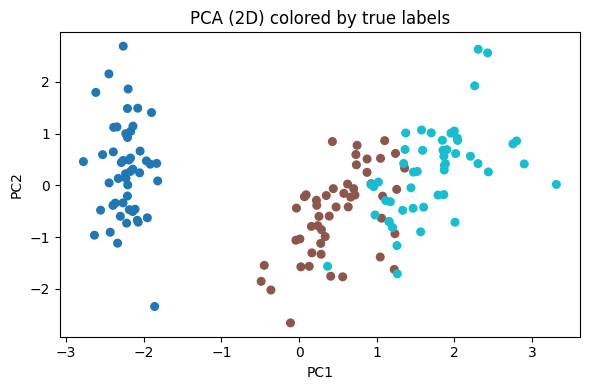

In [14]:
# TODO: Color by true labels (if available) or by cluster labels

# Plot PCA projection colored by true labels
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", s=30)
plt.title("PCA (2D) colored by true labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

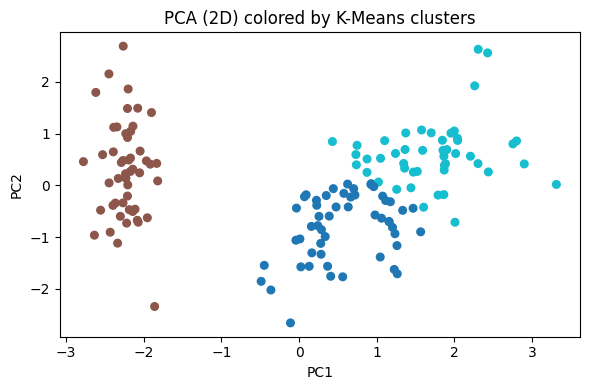

In [15]:
# Plot PCA projection colored by cluster labels
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="tab10", s=30)
plt.title("PCA (2D) colored by K-Means clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

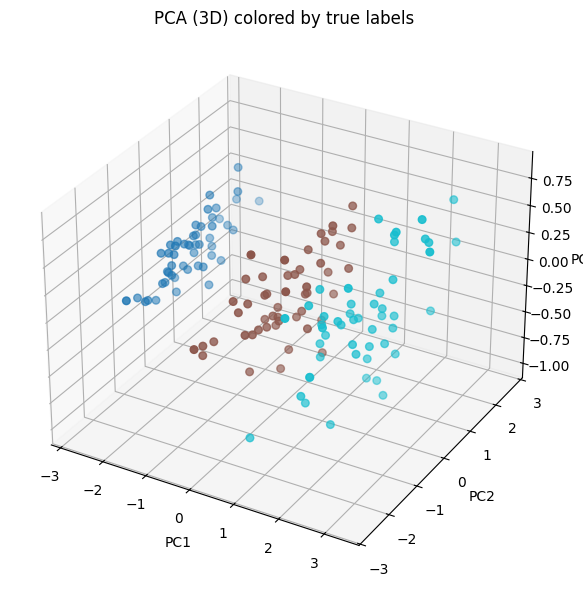

In [ ]:
# BONUS: Plot our 3D pca projection colored by true labels
# This 3D plot requires PCA with n_components=3.
# It will not work if PCA was run with n_components=2.
# Uncomment after changing PCA to 3 components.

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt 
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="tab10", s=30)
# ax.set_title("PCA (3D) colored by true labels")
# ax.set_xlabel("PC1")
# ax.set_ylabel("PC2")
# ax.set_zlabel("PC3")
# plt.tight_layout()
# plt.show()